<a href="https://colab.research.google.com/github/5t4t1ck/attention/blob/main/Attentionv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Dropout,Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
local_zip = 'drive/My Drive/Attention/attention.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/attention')
zip_ref.close()

In [ ]:
base_dir = '/tmp/attention/data/'
train_dir = os.path.join(base_dir)

train_Atento = os.path.join('/tmp/data/data/atento')
train_Desatento = os.path.join('/tmp/data/data/desatento')

In [ ]:
train_Atento_names = os.listdir(train_Atento)
print(train_Atento_names[:10])

train_Desatento_names = os.listdir(train_Desatento)
print(train_Desatento_names[:10])

['attention16116.jpg', 'attention13936.jpg', 'attention14340.jpg', 'attention16322.jpg', 'attention13873.jpg', 'attention14097.jpg', 'attention16031.jpg', 'attention14306.jpg', 'attention14379.jpg', 'attention15699.jpg']
['desatencion275681.jpg', 'attention34582.jpg', 'attention31249.jpg', 'attention32749.jpg', 'attention33635.jpg', 'attention33213.jpg', 'attention35130.jpg', 'attention32435.jpg', 'attention32634.jpg', 'attention31543.jpg']


In [ ]:
print('total training Atento images :', len(os.listdir(train_Atento)))
print('total training Desatento images :', len(os.listdir(train_Desatento)))

total training Atento images : 2002
total training Desatento images : 2001


In [ ]:
for attention in os.listdir(base_dir):
    #['Atento', 'Desatento']
    #print(str(len(os.listdir(base_dir))))
    print(str(len(os.listdir(base_dir + attention))) + " " + attention +" images")

2001 desatento images
2002 atento images


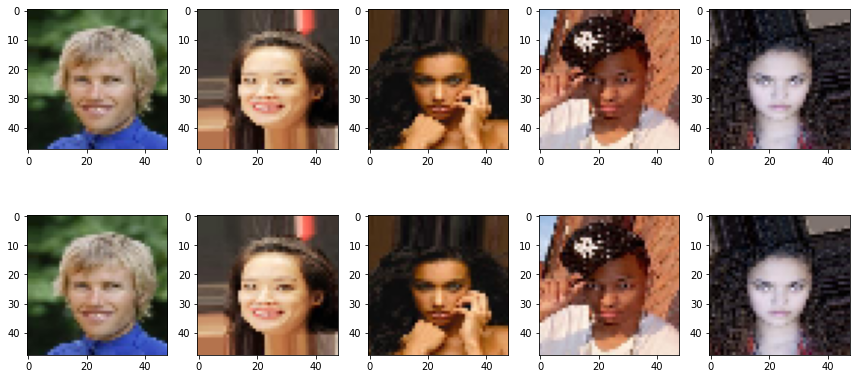

In [ ]:
# size of the image: 48*48 pixels
pic_size = 48

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_dir):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_dir + attention + "/" +os.listdir(base_dir + attention)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
#datagen_validation = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(base_dir,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 4003 images belonging to 2 classes.


In [ ]:
#No. of possible label values
nb_classes = 2
#Initialising the CNN
model = Sequential()
#1
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(128,(5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3
model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4
model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Flattening
model.add(Flatten())

#Full connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Full connected layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation = 'softmax'))

opt = Adam(lr = 0.0001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
#Training

In [ ]:
# number of epochs to train the NN
epochs = 200
from keras.callbacks import ModelCheckpoint

#checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
#steps per epoch = 28273/128 = 220
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs = epochs,
                                verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
31/31 [==============================] - 94s 3s/step - loss: 0.8039 - accuracy: 0.5419
Epoch 2/200
31/31 [==============================] - 94s 3s/step - loss: 0.7533 - accuracy: 0.5830
Epoch 3/200
31/31 [==============================] - 94s 3s/step - loss: 0.7207 - accuracy: 0.5961
Epoch 4/200
31/31 [==============================] - 94s 3s/step - loss: 0.7237 - accuracy: 0.5982
Epoch 5/200
31/31 [==============================] - 94s 3s/step - loss: 0.6989 - accuracy: 0.6227
Epoch 6/200
31/31 [==============================] - 94s 3s/step - loss: 0.7044 - accuracy: 0.6253
Epoch 7/200
31/31 [==============================] - 94s 3s/step - loss: 0.6719 - accuracy: 0.6423
Epoch 8/200
31/31 [==============================] - 94s 3s/step - loss: 0.6606 - accuracy: 0.6619
Epoch 9/200
31/31 [==============================] - 94s 3s/step - loss: 0.6648 - accuracy: 0.6524
Epoch 10/200
31/31 [=============

KeyError: ignored

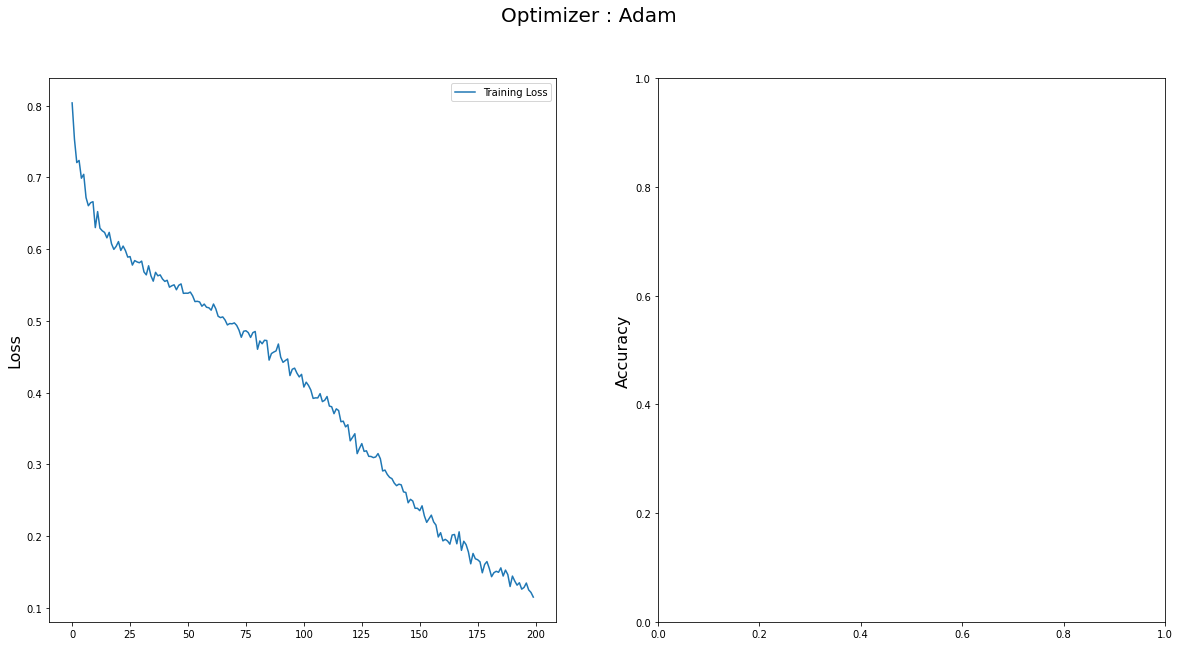

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
#########################################################################
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
#plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# create on Colab directory
model.save('model.h5')   

#Saving in DRIVE
#From Deep lizard

model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model1.h5')
model_file.Upload()

FileNotFoundError: ignored

In [ ]:
new_model = load_model('model.h5')

In [ ]:
model_test = keras.models.load_model("model.h5")

NameError: ignored

In [ ]:
# download to google drive
#drive.CreateFile({'id': model_file.get('id')})

In [ ]:
#model.save_weights('model_weights.h5')
#weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
#weights_file.SetContentFile('model_weights.h5')
#weights_file.Upload()
#drive.CreateFile({'id': weights_file.get('id')})

In [ ]:
# 3. reload weights from google drive into the model

# use (get shareable link) to get file id
#last_weight_file = drive.CreateFile({'id': '1i_6BpxqgNbMjmbw6ML1mnBjoYi_LuO4Y'}) 
#last_weight_file.GetContentFile('last_weights.mat')
#model.load_weights('last_weights.mat')

In [ ]:
#new_model.summary()

In [ ]:
#new_model.get_weights()

In [ ]:
#json_string = model.to_json()
#yaml_string = model.to_yaml()
#from keras.models import model_from_json
#model_architecture = model_from_json(json_string)
#model_architecture.summary()

In [ ]:
#model.save_weights('my_model_weights.h5')
#Go to deeplizard